## 畳み込み

$
(f * g)(x) = \sum_{i} f(i)g(x-i)
$

有限の離散関数の場合、$f$の要素数を$N$、$g$の要素数を$M$としたとき、

計算量は$O((N+M-1) \times N)$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 定義どおりのやつ
def convolve(f, g):
    n = len(f)
    m = len(g)
    def inner(x):
        for i in range(n):
            if x - i <= 0 or x - i >= m: continue
                
            yield f[i] * g[x-i]
            
    w = [sum(inner(x)) for x in range(n + m - 1)]
            
    return np.array(w)

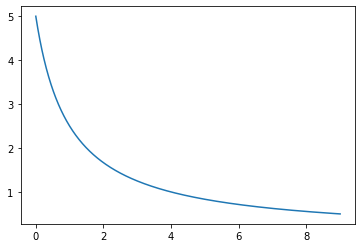

In [3]:
xs = np.linspace(0, 9, 900)

v = 5 / (xs + 1)
u = np.linspace(0, 1, 100)

plt.plot(xs, v)

処理の時間: 0.08045458793640137 s
999


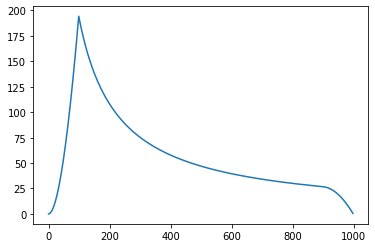

In [4]:
import time

start = time.time()
w = convolve(v, u)
print("処理の時間:", time.time() - start, "s")
print(len(w))
plt.plot(w)

処理の時間 0.0003974437713623047 s
999


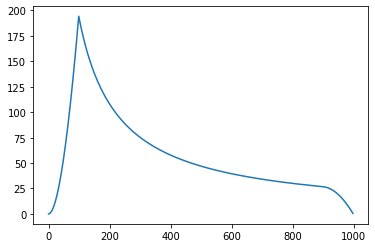

In [5]:
# numpyのと比較
start = time.time()
w = np.convolve(v, u)
print("処理の時間", time.time() - start, "s")
print(len(w))
plt.plot(w)

## 畳み込み定理

$
\mathcal{F}(f * g) = \mathcal{F}(f) \cdot \mathcal{F}(g)
$


処理の時間 0.0002002716064453125 s
999


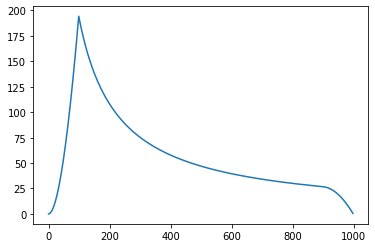

In [6]:
# conf8o/aroundfft
import aroundfft

start = time.time()
w = aroundfft.convolve(v, u)
print("処理の時間", time.time() - start, "s")
print(len(w))
plt.plot(w)